<a href="https://colab.research.google.com/github/Nimo160302/Deep_Learning_Codes/blob/main/VGG16%26ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Load and Freeze VGG16 (3 Marks)
Write Python code to:

Load the VGG16 model using pretrained weights (weights='imagenet') with include_top=False.

Freeze all layers of the model.

Print the number of trainable and non-trainable parameters in the model.

Q2. Compare Output Shapes of VGG16 and ResNet50 (3 Marks)
Write Python code to:

Load any sample image and resize it to 224×224.

Preprocess the image appropriately.

Pass it through VGG16 and ResNet50 (with include_top=False).

Print the output feature map shapes from both models.

Q3. Use ResNet50 for Classification (4 Marks)
Write Python code to:

Load the ResNet50 model with include_top=True and pretrained ImageNet weights.

Load a sample image, resize and preprocess it correctly.

Use the model to predict the class.

Display the top 3 predictions using decode_predictions.

In [89]:
import tensorflow as tf
from tensorflow.keras import applications as app

Q1. Load and Freeze VGG16 (3 Marks) Write Python code to:

Load the VGG16 model using pretrained weights (weights='imagenet') with include_top=False.

Freeze all layers of the model.

Print the number of trainable and non-trainable parameters in the model.

In [90]:
k  = app.VGG16(
    include_top = False,
    weights ='imagenet'
)

In [91]:
k.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [92]:
for layer in k.layers:
  layer.trainable = False

Q2. Compare Output Shapes of VGG16 and ResNet50 (3 Marks) Write Python code to:

Load any sample image and resize it to 224×224.

Preprocess the image appropriately.

Pass it through VGG16 and ResNet50 (with include_top=False).

Print the output feature map shapes from both models.

In [93]:
import numpy as np
import matplotlib.pyplot as plt
path  = '/content/img.jpg'
#loading image and resizing to 224x224
img = tf.keras.preprocessing.image.load_img(path)
# img

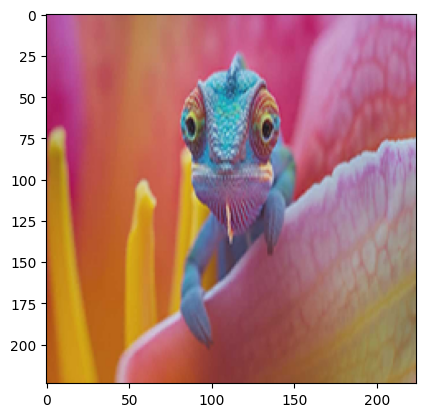

In [94]:
img_resize  =  tf.image.resize(img, size  =  (224,224))
img_resize.shape
plt.imshow(img_resize.numpy().astype('uint8'))
plt.show()

In [95]:
#Passing image thru Vgg16 and ResNet
#The standard input size for VGG16 is 224x224
#include_top = True means loading VGG16 with the classification layers
'''VGG16 expects the input image to be preprocessed in a specific way, which involves subtracting
 the mean pixel values. Keras provides a utility function for this.'''

img_array = tf.keras.preprocessing.image.img_to_array(img_resize)
img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
img_array = img_array.copy()
img_preprocessed = app.vgg16.preprocess_input(img_array)

print(img_preprocessed.shape)

(1, 224, 224, 3)


In [96]:
features = k.predict(img_preprocessed)
print("Shape of output features from VGG16 base:", features.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step
Shape of output features from VGG16 base: (1, 7, 7, 512)


In [97]:
L  = app.ResNet50(
    include_top = False,
    weights = 'imagenet'
)

In [98]:
# L.summary()

In [99]:
for layer in L.layers:
  layer.trainable = False

In [100]:
#Preprocessed img for resnet
img_preprocessed = app.resnet50.preprocess_input(img_array)
print(img_preprocessed.shape)

(1, 224, 224, 3)


In [101]:
features_resnet  =  L.predict(img_preprocessed)
print("Shape of output features from ResNet50 base:", features_resnet.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Shape of output features from ResNet50 base: (1, 7, 7, 2048)


Q3. Use ResNet50 for Classification (4 Marks) Write Python code to:

Load the ResNet50 model with include_top=True and pretrained ImageNet weights.

Load a sample image, resize and preprocess it correctly.

Use the model to predict the class.

Display the top 3 predictions using decode_predictions.

In [102]:
R = app.ResNet50(
    include_top  = True,
    weights = 'imagenet'
)

In [103]:
# R.summary()

In [104]:
path  =  '/content/dog.jpg'
img_dog  =  tf.keras.preprocessing.image.load_img(path)

In [105]:
img_dog =  tf.image.resize(img_dog , size =(224,224))
img_array = tf.keras.preprocessing.image.img_to_array(img_dog)
img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
img_array = img_array.copy()
img_preprocessed_dog = app.resnet50.preprocess_input(img_array)

In [106]:
img_preprocessed_dog.shape

(1, 224, 224, 3)

In [107]:
app.resnet50.decode_predictions(R.predict(img_preprocessed_dog), top =3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


[[('n02099601', 'golden_retriever', np.float32(0.73777837)),
  ('n02091831', 'Saluki', np.float32(0.061007354)),
  ('n02099712', 'Labrador_retriever', np.float32(0.04302272))]]

In [109]:
app.resnet50.decode_predictions(R.predict(img_preprocessed), top =3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


[[('n02607072', 'anemone_fish', np.float32(0.43208724)),
  ('n01818515', 'macaw', np.float32(0.06460216)),
  ('n01682714', 'American_chameleon', np.float32(0.03556967))]]

array([[[[ -47.878006 , -160.558    ,  -70.36     ],
         [ -47.878006 , -160.558    ,  -70.36     ],
         [ -47.878006 , -160.558    ,  -70.36     ],
         ...,
         [  -7.663727 ,  -69.665146 ,  -61.14572  ],
         [  -7.663727 ,  -69.665146 ,  -61.14572  ],
         [  -7.770859 ,  -69.77228  ,  -61.252853 ]],

        [[ -49.878006 , -160.558    ,  -70.36     ],
         [ -49.878006 , -160.558    ,  -70.36     ],
         [ -49.878006 , -160.558    ,  -70.36     ],
         ...,
         [  -7.878006 ,  -72.62689  ,  -60.291107 ],
         [  -7.878006 ,  -72.58095  ,  -60.33705  ],
         [  -9.520859 ,  -74.31563  ,  -61.888092 ]],

        [[ -53.02086  , -160.62943  ,  -71.43143  ],
         [ -51.949432 , -159.558    ,  -70.36     ],
         [ -51.949432 , -159.558    ,  -70.36     ],
         ...,
         [  -8.834595 ,  -78.33609  ,  -59.523117 ],
         [  -6.8448334,  -76.203384 ,  -57.75287  ],
         [ -10.878006 ,  -80.5222   ,  -61.34738  ]],